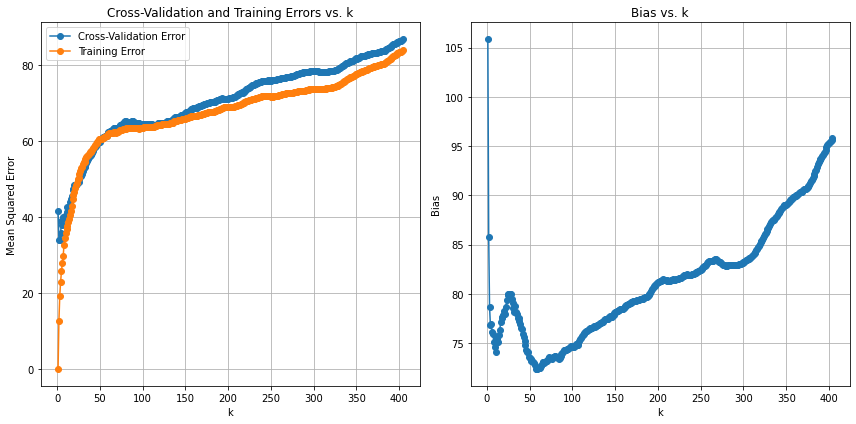

Best model k: 2
Test Error (MSE) for Best model k: 33.95007352941176


In [12]:
# Hritheekka Chinnakonda, chinnakh, 400292782

#importing libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def cross_validation_knn(data, k_values, X_train, y_train, X_test, y_test):
    
    # initializing variables and arrays to store mse values
    best_k = None 
    best_mse = float('inf') # positive infinity 
    train_mse_values = []
    cross_mse_error = []
    
    # iterating through each k value in range
    for k in k_values:
        knearest_neigh = KNeighborsRegressor(n_neighbors=k) # create a KNeighborsRegrssor with k
        knearest_neigh.fit(X_train, y_train) # fit model to the training data
        y_pred = knearest_neigh.predict(X_test) # predict target values for test data
        cross_error = mean_squared_error(y_test, y_pred) # calculated cross validation mse
        cross_mse_error.append(cross_error) # add value to list
        
        train_pred = knearest_neigh.predict(X_train) # predict target values for training data
        train_mse = mean_squared_error(y_train, train_pred) # calculated cross validation mse
        train_mse_values.append(train_mse) # add value to list

        # updating best model k and mse
        if cross_error < best_mse:
            best_mse = cross_error
            best_k = k
        
    return best_k, best_mse, cross_mse_error, train_mse_values 

def calculate_bias_variance(X, y, k_values, num_folds=5):
    # number of folds = 5
    
    # initializing empty arrays to store bias and variance values
    bias_values = []
    variance_values = []

    for k in k_values:
        knearest_neigh = KNeighborsRegressor(n_neighbors=k)
        mse_scores = -cross_val_score(knearest_neigh, X, y, cv=num_folds, scoring='neg_mean_squared_error') # performs cross-validation with k-NN

        # calculating bias and variance
        bias = np.mean(mse_scores)
        variance = np.var(mse_scores)

        # appending values to respective arrays
        bias_values.append(bias)
        variance_values.append(variance)

    return bias_values, variance_values

def main():
    
    # DATASET
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    
    '''
    # Remove rows containing NaN values
    raw_df = raw_df.dropna()

    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    '''
    
    RANDOM_SEED = 2782 # last 4 digits of student number

    np.random.seed(RANDOM_SEED) # seed for pseudo number generator

    # data split into training and test sets (80%-20% split)
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=RANDOM_SEED)

    '''
    # normalizing and standarization of data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    '''
    N = X_train.shape[0]
    k_values = range(1, N + 1) # using range(1, N + 1) for full dataset
    

    best_k, best_mse, mse_values, train_mse_values = cross_validation_knn(data, k_values, X_train, y_train, X_test, y_test)

    bias_values, variance_values = calculate_bias_variance(data, target, k_values)

    plt.figure(figsize=(12, 6))

    # plotting cross-validation error and training error vs k
    plt.subplot(1, 2, 1)
    plt.plot(k_values, mse_values, marker='o', linestyle='-', label='Cross-Validation Error')
    plt.plot(k_values, train_mse_values, marker='o', linestyle='-', label='Training Error')
    plt.title("Cross-Validation and Training Errors vs. k")
    plt.xlabel("k")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    
    
    # plotting bias vs k
    plt.subplot(1, 2, 2)
    plt.plot(k_values, bias_values, marker='o', linestyle='-')
    plt.title("Bias vs. k")
    plt.xlabel("k")
    plt.ylabel("Bias")
    plt.grid()
    '''
    # plotting variance vs k
    plt.subplot(1, 2, 2)
    plt.plot(k_values, variance_values, marker='o', linestyle='-')
    plt.title("Variance vs. k")
    plt.xlabel("k")
    plt.ylabel("Variance")
    plt.grid()
    '''
    plt.tight_layout()
    plt.show()

    # outputting the best model and the test error
    print(f"Best model k: {best_k}")
    print(f"Test Error (MSE) for Best model k: {best_mse}")

if __name__ == "__main__":
    main()
